In [12]:
import os
print(os.listdir())



['Superstore.csv']


In [16]:
df = pd.read_csv("Superstore.csv", encoding='latin1')
print(df.head())



   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [18]:
# Check dataset info
print(df.info())

# See summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# View the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [19]:
print(df.info())
print(df.isnull().sum())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [21]:
print(df.isnull().sum())



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [25]:
df = df.dropna(subset=['Postal Code'])


In [26]:
df['Discount'] = df['Discount'].fillna(df['Discount'].median())


In [27]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()


Duplicate rows: 0


In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [29]:
df.isnull().sum()



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [30]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("Superstore.csv", encoding='latin1')

# 2. View basic info
print("Basic Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Drop rows with missing values in important columns (like 'Customer Name', 'Order ID', etc.)
# Adjust column names if your dataset differs
df = df.dropna(subset=['Customer Name', 'Order ID'])

# 4. Fill missing values in 'Postal Code' with 0 (optional)
if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# 5. Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Drop rows where date conversion failed (if any)
df = df.dropna(subset=['Order Date', 'Ship Date'])

# 6. Remove duplicate rows (if any)
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# 7. Optional: Reset the index
df = df.reset_index(drop=True)

# 8. Final check
print("\nAfter Cleaning:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 

In [31]:
df.to_csv("Superstore_cleaned.csv", index=False)


In [32]:
print("Columns in dataset:")
print(df.columns)

df.head()


Columns in dataset:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Total Quantity Sold:", df['Quantity'].sum())


Total Sales: 2297200.8603
Total Profit: 286397.0217
Total Quantity Sold: 37873


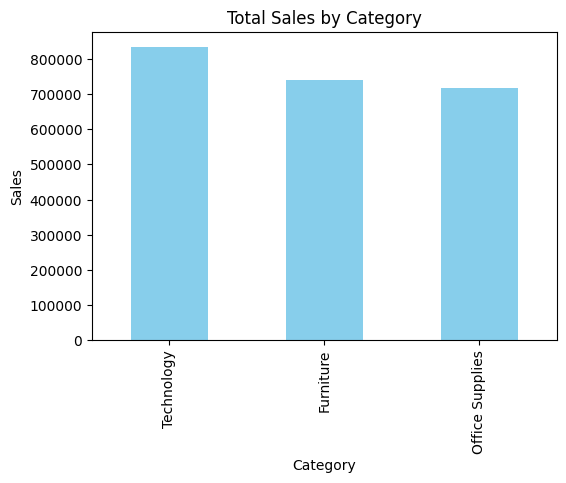

C:\Users\Ashish kadam\AppData\Local\Temp\ipykernel_8344\2507725975.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None)


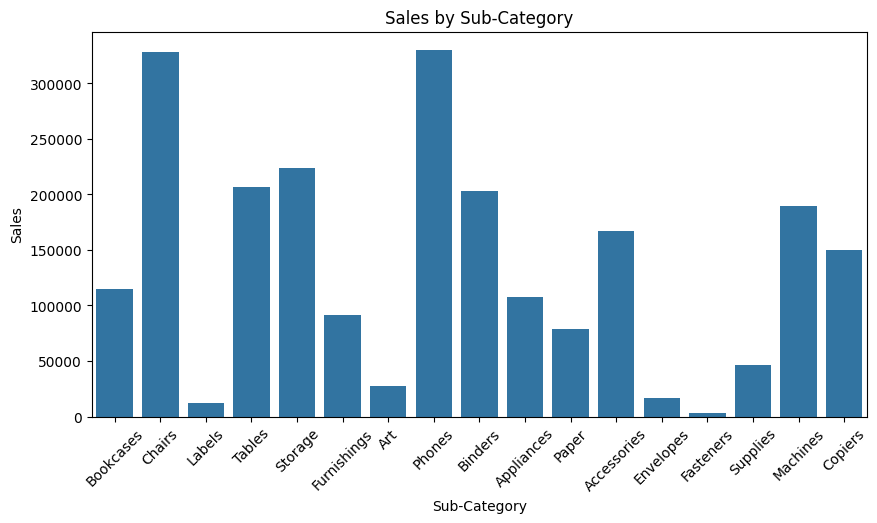

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Category', figsize=(6,4), color='skyblue')
plt.ylabel("Sales")
plt.show()

# Sales by Sub-Category
plt.figure(figsize=(10,5))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title("Sales by Sub-Category")
plt.xticks(rotation=45)
plt.show()


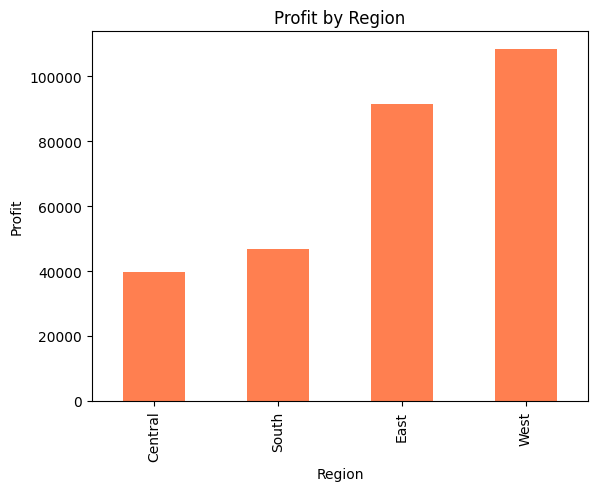

In [35]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit.plot(kind='bar', color='coral', title='Profit by Region')
plt.ylabel("Profit")
plt.show()


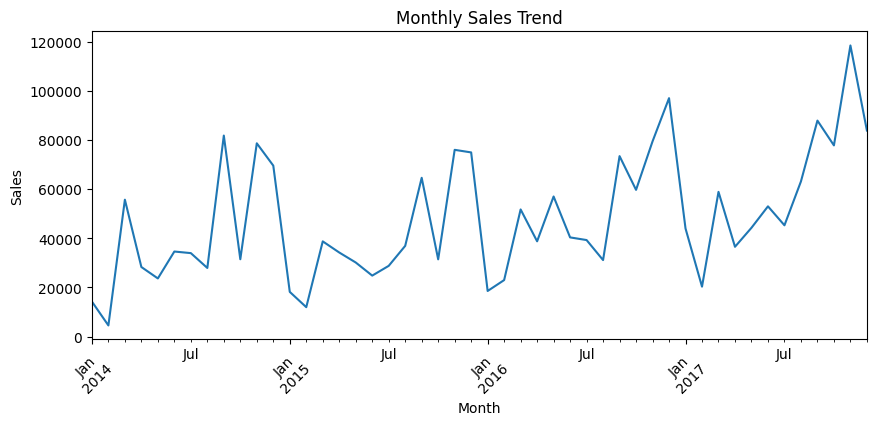

In [36]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,4), title='Monthly Sales Trend')
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


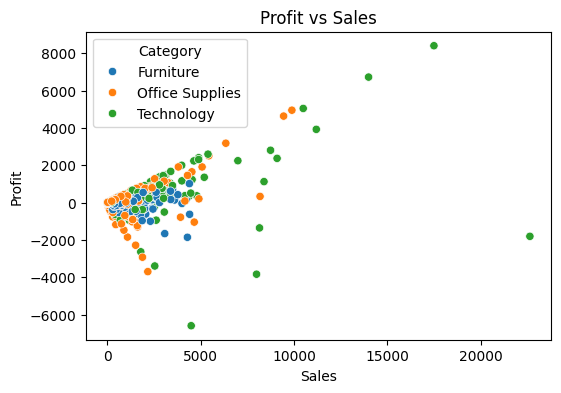

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title("Profit vs Sales")
plt.show()


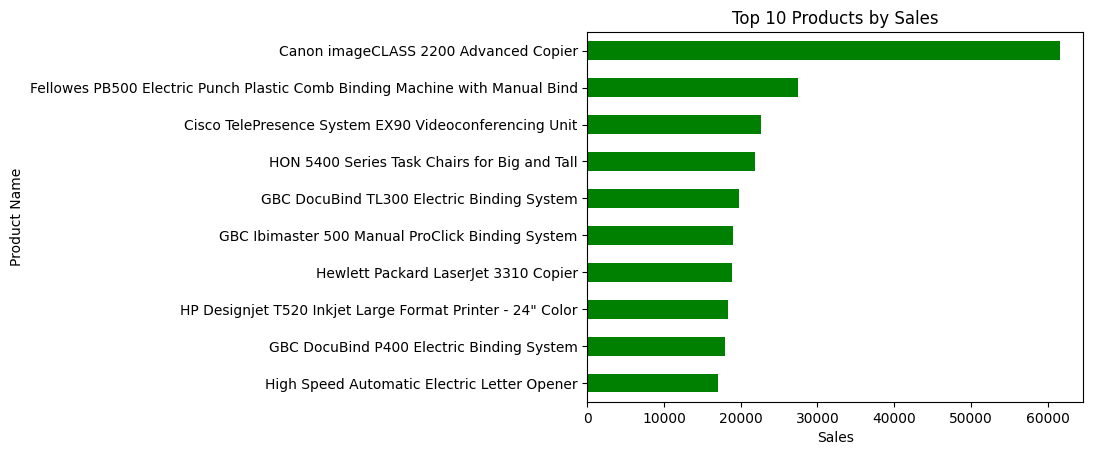

In [38]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='green', title='Top 10 Products by Sales')
plt.xlabel("Sales")
plt.gca().invert_yaxis()
plt.show()
